In [21]:
# importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data= pd.read_csv(r"D:\WORK\Diabetic-prediction-using-multiple-machine-learning-algorithms\diabetes_prediction_dataset.csv")

In [23]:
# top 5 rows of the dataset
data.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [24]:
# checking null values
data.isnull()

gender    age  hypertension  heart_disease  smoking_history    bmi  \
0       False  False         False          False            False  False   
1       False  False         False          False            False  False   
2       False  False         False          False            False  False   
3       False  False         False          False            False  False   
4       False  False         False          False            False  False   
...       ...    ...           ...            ...              ...    ...   
99995   False  False         False          False            False  False   
99996   False  False         False          False            False  False   
99997   False  False         False          False            False  False   
99998   False  False         False          False            False  False   
99999   False  False         False          False            False  False   

       HbA1c_level  blood_glucose_level  diabetes  
0            False                False     False  
1            False                False     False  
2            False                False     False  
3            False                False     False  
4            False                False     False  
...            ...                  ...       ...  
99995        False                False     False  
99996        False                False     False  
99997        False                False     False  
99998        False                False     False  
99999        False                False     False  

[100000 rows x 9 columns]

In [25]:
# describe data set
data.describe()

age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           140.000000       0.000000  
75%         6.200000           159.000000       0.000000  
max         9.000000           300.000000       1.000000

In [26]:
data.shape

(100000, 9)

In [27]:
# EDA

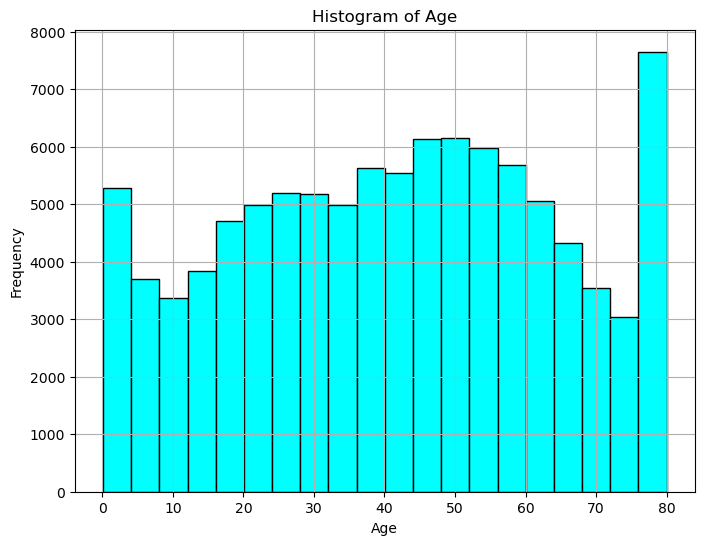

In [28]:
plt.figure(figsize=(8,6))
plt.hist(data['age'], bins=20, edgecolor="black", color="cyan")
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

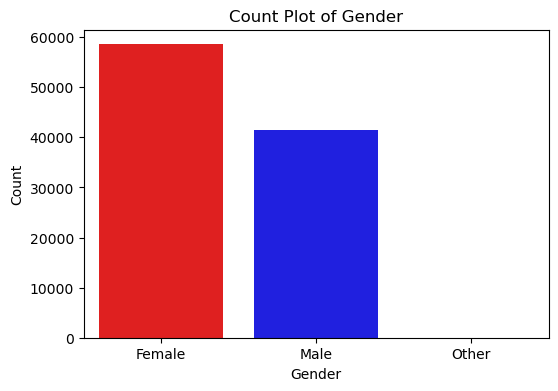

In [29]:
# Defining colors for every gender catagory
colors = {'Male': 'blue', 'Female': 'red', 'Other': 'green'}

plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=data, palette=colors)
plt.title('Count Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

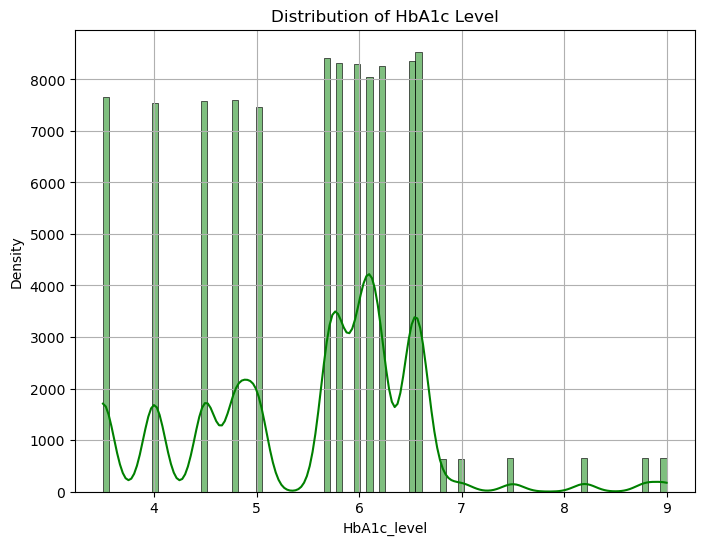

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(data['HbA1c_level'],kde=True, color= 'green')
plt.title('Distribution of HbA1c Level')
plt.xlabel('HbA1c_level')
plt.ylabel('Density')
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

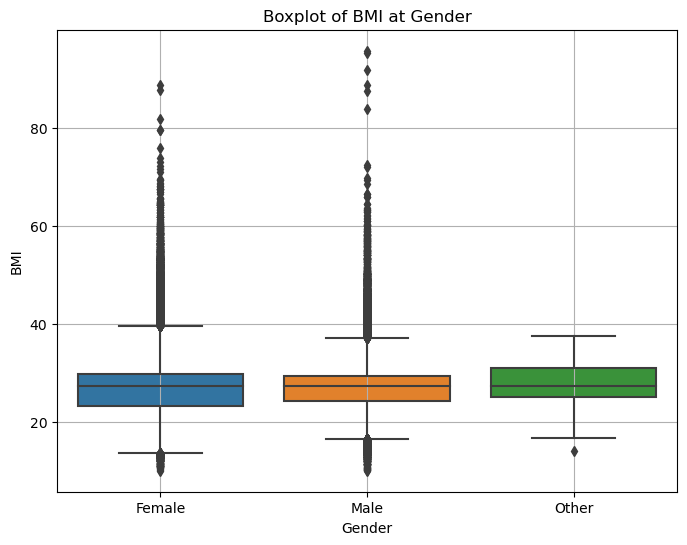

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y= 'bmi', data=data)
plt.title('Boxplot of BMI at Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.grid(True)
plt.show

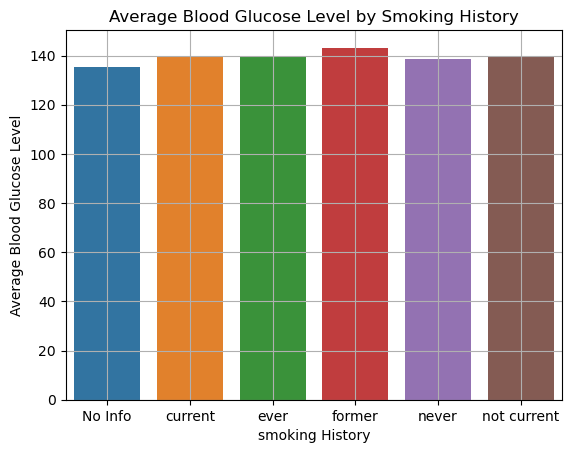

In [32]:
# Defineing the color palatte for several smoking history categories
avg_glucose_by_smoking = data.groupby('smoking_history')['blood_glucose_level'].mean().reset_index()
sns.barplot(x='smoking_history', y='blood_glucose_level', data=avg_glucose_by_smoking)
plt.title('Average Blood Glucose Level by Smoking History')
plt.xlabel('smoking History')
plt.ylabel('Average Blood Glucose Level')
plt.grid(True)
plt.show()

In [33]:
data.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [34]:
from sklearn.preprocessing import LabelEncoder

#transforming categorical to numerical columns
data ['gender'] = LabelEncoder().fit_transform(data ['gender'])
data ['smoking_history'] = LabelEncoder().fit_transform(data ['smoking_history'])


In [36]:
data.head()

gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# separating the features (x) and target variable(y)
x = data.drop('blood_glucose_level', axis=1) # features
y = data['blood_glucose_level'] # target variable

#splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# standardizing the featurs
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Training the linear regresiion model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

# making predictions on the testing set
y_pred = model.predict(x_test_scaled)

# evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')


Mean Absolute Error (MAE): 30.7237
Mean Squared Error (MSE): 1367.3011
R^2 Score: 0.1717


Support Vector Regression (SVR)